<a href="https://colab.research.google.com/github/Irkhammf/Machine-Learning/blob/main/ML_Classification_from%20scratch_and_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORMULASI MASALAH



Mahasiswa harus melakukan proses classification pada dataset yang telah disediakan. Classificationnya tentu dilakukan dengan menggunakan sebuah teknik pendekatan classification yang sudah dipelajari dalam mata kuliah “Pembelajaran Mesin” maupun yang belum dibahas. 

Pendekatan yang digunakan adalah pendekatan  Logistic Regression dan Decision Tree dengan tanpa library untuk classification utama yang merupakan algoritma machine learning berjenis supervised learning. Ada pula KNN, Support Vector Machine dan Naive Bayes Classifier yang keduanya sama-sama supervised learnin dan digunakan sebagai pembanding dan prosesnya dengan menggunkan library yang ada pada python.
Dataset yang disediakan ada 2 yaitu data kendaraan train dan data kendaraan test. Hasilnya akan berupa akurasi setiap metode klasifikasi.

# EKSPLORASI DATA DAN PERSIAPAN DATA

## Import library yang digunakan

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import MinMaxScaler
import scipy.io as scipy
from collections import defaultdict
%matplotlib inline
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB #untuk eksperimen
from sklearn.svm import SVC #Untuk eksperimen
from sklearn.neighbors import KNeighborsClassifier #Untuk eksperimen

## Import file data dan baca file data

In [ ]:
#import dariGdrive ke collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#insert data kendaraan test dan train dari Gdrive ke collab
data_train=pd.read_csv('gdrive/My Drive/kendaraan_train.csv')
data_test=pd.read_csv('gdrive/My Drive/kendaraan_test.csv')

## Tampilkan data yang akan digunakan

In [ ]:
#output data kendaraan train dari Gdrive ke collab
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#output data kendaraan testdari Gdrive ke collab
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


## Mengambil kolom data yang ingin diproses

In [ ]:
#Mengambil kolom data train yang akan digunakan serta diamati yaitu 'Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik'
data_train = data_train[['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']]
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
#karena kolom data test sudah sesuai dengan yang kita inginkan maka outputkan saja lagi data testnya
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
# Menampilkan deskripsi statistik data train
data_train.describe(include = "all")

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271391,271617.000000,271427.000000,271525.000000,271602.000000,271556,271643,271262.000000,271532.000000,271839.000000,285831.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,146678,NaN,NaN,NaN,NaN,142761,137123,NaN,NaN,NaN,NaN
mean,NaN,38.844336,0.997848,26.405410,0.458778,NaN,NaN,30536.683472,112.021567,154.286302,0.122471
std,NaN,15.522487,0.046335,13.252714,0.498299,NaN,NaN,17155.000770,54.202457,83.694910,0.327830
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24398.000000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31646.000000,132.000000,154.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39377.750000,152.000000,227.000000,0.000000


In [ ]:
# Menampilkan deskripsi statistik data test
data_test.describe(include = "all")

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639,47639.000000,47639.000000,47639.000000,47639.000000,47639,47639,47639.000000,47639.000000,47639.000000,47639.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,25870,NaN,NaN,NaN,NaN,24966,24041,NaN,NaN,NaN,NaN
mean,NaN,38.815466,0.997922,26.331514,0.457608,NaN,NaN,30626.481202,112.180566,154.447574,0.123029
std,NaN,15.548817,0.045540,13.213353,0.498205,NaN,NaN,17404.792248,54.162703,83.642137,0.328474
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24395.500000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31738.000000,135.000000,155.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39474.500000,152.000000,227.000000,0.000000


## Menjabarkan isi data secara statitsik dan deskrptif yang digunakan

In [ ]:
#Menampilkan tipe dari kolom dataset
#data train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [ ]:
#Menampilkan tipe dari kolom dataset
#data test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


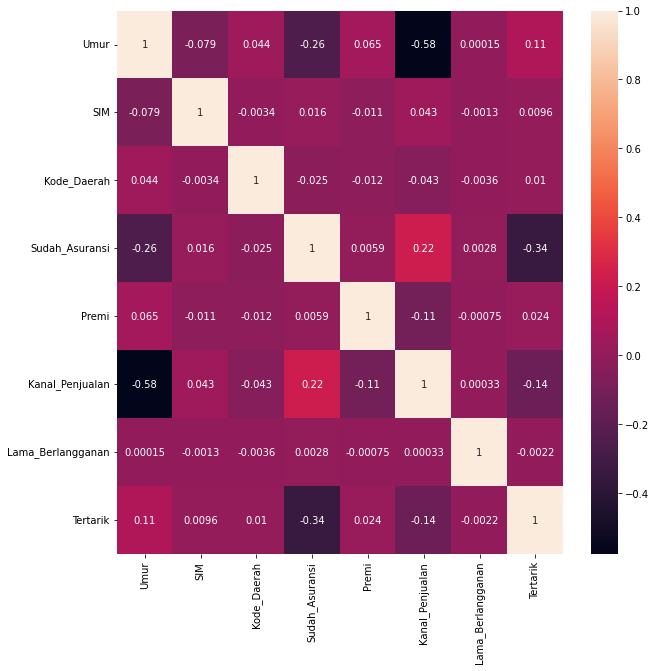

In [ ]:
#Menampilkan heatmap data train
import seaborn as sns
corelation = data_train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corelation, annot=True, ax=ax)

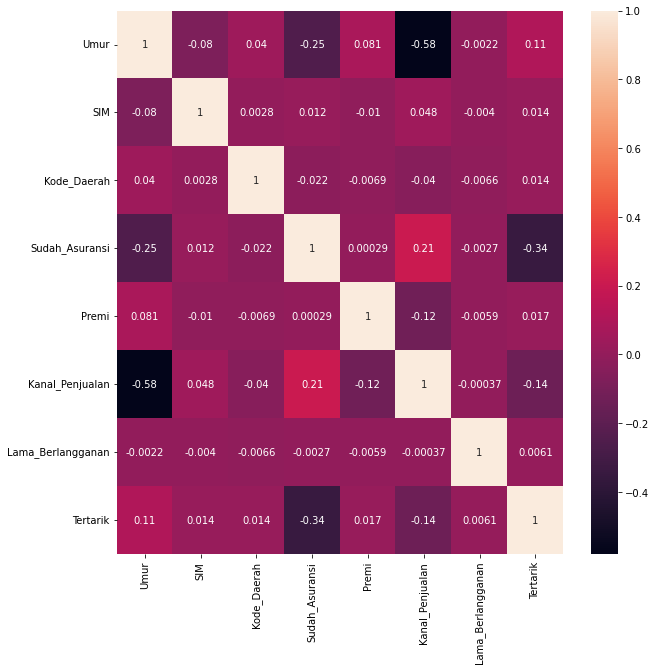

In [ ]:
#Menampilkan heatmap data test
import seaborn as sns
corelation = data_test.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corelation, annot=True, ax=ax)

## Cek Missing Value

In [ ]:
#Pengecekan banyaknya data Nan yang ada dalam data_train
data_train.isnull().sum().sum()

142916

In [ ]:
#Pengecekan banyaknya data Nan yang ada dalam data_test
data_test.isnull().sum().sum()

0

In [ ]:
#Pengecekan banyaknya data Nan yang ada dalam data_train pada setiap kolom
data_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#Pengecekan banyaknya data Nan yang ada dalam data_test pada setiap kolom
data_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## Encoding data

In [ ]:
#Encode Label data train
#Langkah atau proses yang akan dilakukan selanjutnya adalah encoding label pada kolom Jenis_Kelamin	 dan Kendaraan_Rusak. Isi dari kolom ini akan diubah menjadi 1 dan 0 dari Ya dan Tidak
#Encode label Jenis_Kelamin	
data_train["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0], inplace = True)
data_train

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#Encode label Kendaraan_Rusak
data_train["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0], inplace = True)
data_train

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,< 1 Tahun,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,> 2 Tahun,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1-2 Tahun,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,< 1 Tahun,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,< 1 Tahun,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1-2 Tahun,0.0,30503.0,124.0,270.0,0


In [ ]:
#Encode label Umur Kendaraan
data_train["Umur_Kendaraan"].replace(["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"], [1,2,3], inplace = True)
data_train

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,1.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,3.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,1.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,2.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,3.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,1.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,1.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,1.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,2.0,0.0,30503.0,124.0,270.0,0


In [ ]:
#Encode Label data test
#Langkah atau proses yang akan dilakukan selanjutnya adalah encoding label pada kolom Jenis_Kelamin	 dan Kendaraan_Rusak. Isi dari kolom ini akan diubah menjadi 1 dan 0 dari Ya dan Tidak
#Encode label Jenis_Kelamin	
data_test["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0], inplace = True)
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,1,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,1,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,1,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,1,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,1,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,1,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,1,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
#Encode label Kendaraan_Rusak
data_test["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0], inplace = True)
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1-2 Tahun,1,46963,26,145,0
1,1,22,1,47,1,< 1 Tahun,0,39624,152,241,0
2,1,24,1,28,1,< 1 Tahun,0,110479,152,62,0
3,1,46,1,8,1,1-2 Tahun,0,36266,124,34,0
4,1,35,1,23,0,1-2 Tahun,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,> 2 Tahun,1,31039,124,67,0
47635,1,41,1,15,0,1-2 Tahun,1,2630,157,232,0
47636,1,24,1,29,1,< 1 Tahun,0,33101,152,211,0
47637,1,59,1,30,0,1-2 Tahun,1,37788,26,239,1


In [ ]:
#Encode label Umur Kendaraan
data_test["Umur_Kendaraan"].replace(["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"], [1,2,3], inplace = True)
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,2,1,46963,26,145,0
1,1,22,1,47,1,1,0,39624,152,241,0
2,1,24,1,28,1,1,0,110479,152,62,0
3,1,46,1,8,1,2,0,36266,124,34,0
4,1,35,1,23,0,2,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,3,1,31039,124,67,0
47635,1,41,1,15,0,2,1,2630,157,232,0
47636,1,24,1,29,1,1,0,33101,152,211,0
47637,1,59,1,30,0,2,1,37788,26,239,1


In [ ]:
#Mengecek kembali tipe dari kolom dataset
#data train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  float64
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  float64
 6   Kendaraan_Rusak    271643 non-null  float64
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 24.0 MB


In [ ]:
#Mengecek kembali tipe dari kolom dataset
#data test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   SIM                47639 non-null  int64
 3   Kode_Daerah        47639 non-null  int64
 4   Sudah_Asuransi     47639 non-null  int64
 5   Umur_Kendaraan     47639 non-null  int64
 6   Kendaraan_Rusak    47639 non-null  int64
 7   Premi              47639 non-null  int64
 8   Kanal_Penjualan    47639 non-null  int64
 9   Lama_Berlangganan  47639 non-null  int64
 10  Tertarik           47639 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


## Penanganan Missing Value

In [ ]:
#Mengisi dataset kolom yang bernilai NaN dengan nilai mean
#data train 
data_train = data_train.fillna(data_train.mean())
#mengoutputkan kembali varibel Tabel
data_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,30.0,1.0,33.0,1.0,1.0,0.000000,28029.0,152.0,97.0,0
1,1.000000,48.0,1.0,39.0,0.0,3.0,1.000000,25800.0,29.0,158.0,0
2,0.540467,21.0,1.0,46.0,1.0,1.0,0.000000,32733.0,160.0,119.0,0
3,0.000000,58.0,1.0,48.0,0.0,2.0,0.000000,2630.0,124.0,63.0,0
4,1.000000,50.0,1.0,35.0,0.0,3.0,0.504791,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.000000,23.0,1.0,4.0,1.0,1.0,0.000000,25988.0,152.0,217.0,0
285827,0.000000,21.0,1.0,46.0,1.0,1.0,0.000000,44686.0,152.0,50.0,0
285828,0.000000,23.0,1.0,50.0,1.0,1.0,0.000000,49751.0,152.0,226.0,0
285829,1.000000,68.0,1.0,7.0,1.0,2.0,0.000000,30503.0,124.0,270.0,0


In [ ]:
#Pengecekan kembali banyaknya data Nan yang ada dalam data_train pada setiap kolom
data_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## SPLIT DATA

In [ ]:
# Train Model
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label\
x_test = data_test.iloc[1:, :-1].values
y_test = data_test.iloc[1:, -1].values

x_train = data_train.iloc[1:, :-1].values
y_train = data_train.iloc[1:, -1].values

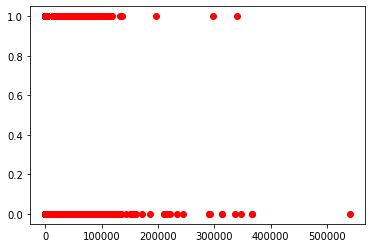

In [ ]:
#Data Exploration for Test Data
plt.plot(x_test,y_test,'ro')

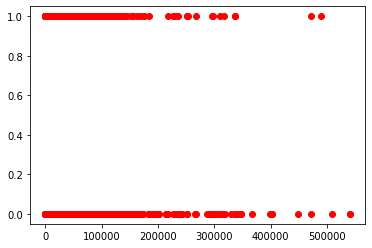

In [ ]:
#Data Exploration for Train Data
plt.plot(x_train,y_train,'ro')

## Normalisasi data

In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
x_test = min_max_scaler.fit_transform(x_test)
x_train = min_max_scaler.transform(x_train)

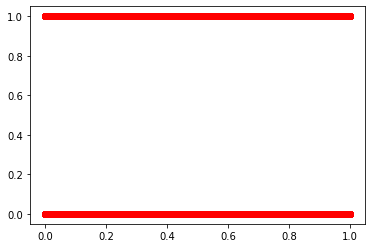

In [ ]:
#Data Exploration for Test Data
plt.plot(x_test,y_test,'ro')

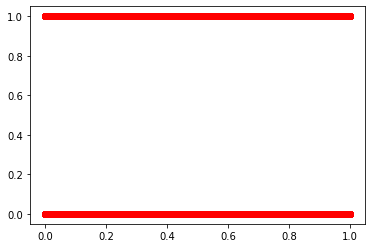

In [ ]:
#Data Exploration for Train Data
plt.plot(x_train,y_train,'ro')

# PEMODELAN

### Rumus Binary Cross Entropy
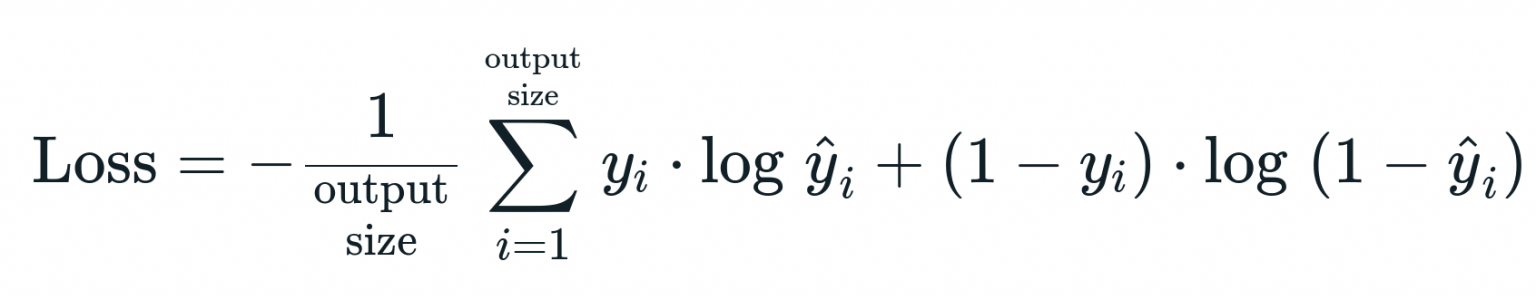

## Logictic Regression from scratch

In [ ]:
#Membuat class pimplementasikan model regresi logistik dengan penurunan gradien
class LogisticRegression:

    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
    #Mendefinisikan fungsi sigmoid    
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
    #Membuat method penghitung nilai binary_cross_entropy dengan menggunakan nilai yang sebenarnya dengan nilai kemungkinan prediksi
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        #y adalah bentuk array yang mengacu class nilai sebenarnya
        #y_hat adalah bentuk array yang mengacu nilai kemungkinan prediksi
        def safe_log(x): 
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)
    #Membuat method penghitung koefensiensi pada model logistic regression    
    def fit(self, X, y):
        #X: array, feature
        #y : array, nilai yang sebenarnya
        # 1. Inisialisasi koefisien
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Melukan penurunan gradien
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)
            
            # Menghitung nilai derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))
            
            # Mengupdate nilai koefisien
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
    #Menghitung probabilitas prediksi untuk ambang batas tertentu dengan menggunakan persamaan garis melewati fungsi sigmoid        
    def predict_proba(self, X):
        #X: array, feature
        #return: array, prediction probabilities
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    #Membuat methods prediksi dengan menggunakan persamaan garis yang melewati fungsi sigmoid.
    def predict(self, X, threshold=0.5):
        #X: array, features
        #threshold: float, classification threshold
        #return: array, predictions
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
predict = model.predict(x_test)
result_lr = pd.concat([pd.DataFrame(y_test,columns=['Pasti']), pd.DataFrame(predict,columns=['Prediksi'])], axis=1)
result_lr

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47633,0,0
47634,0,0
47635,0,0
47636,1,0


# EVALUASI DAN VISUALISASI

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict, digits=4))

              precision    recall  f1-score   support

           0     0.8769    0.9990    0.9340     41777
           1     0.0238    0.0002    0.0003      5861

    accuracy                         0.8761     47638
   macro avg     0.4503    0.4996    0.4672     47638
weighted avg     0.7719    0.8761    0.8191     47638



In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predict)
print("Akurasi Prediksi : ",np.round(accuracy_score(y_test, predict) * 100),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  88.0 %
Hasil dari Confusion Matrix
[[41736    41]
 [ 5860     1]]


# EKSPERIMEN

## Decision Tree from scratch



In [ ]:
#Dengan Decision Tree
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label
dt_x_test = data_test.iloc[1:, :-1].values
dt_y_test = data_test.iloc[1:, -1].values

dt_x_train = data_train.iloc[1:, :-1].values
dt_y_train = data_train.iloc[1:, -1].values

In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
dt_x_test = min_max_scaler.fit_transform(dt_x_test)
dt_x_train = min_max_scaler.transform(dt_x_train)

Rumus entopy

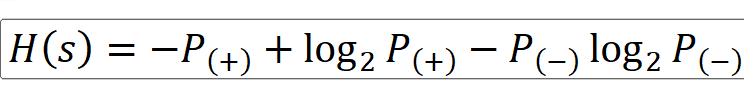

In [ ]:
#Pemodelan DecisionTree from scratch
#membuat method entropy
#entropy adalah informasi yang menyatakan ukuran ketidakpastian(impurity) dari attribut dari suatu kumpulan obyek data dalam satuan bit.
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])
#membuat method node decesion tree
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
#membuat class utama decesion tree 
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
    #membuat prediksi pada decetion tree
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    #membuat method tree
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # memilih split terbaik menurut perolehan informasi
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # mendefinisikan percabangan pada slipt data yang dipilih
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)
    #membuat method menentukan kriteria terbaik
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh
    #membuat method untuk mengetahui informasi tree
    def _information_gain(self, y, X_column, split_thresh):
        # menginisiasi entropy untuk parent
        parent_entropy = entropy(y)

        # menghasilkan percabangan
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # menghitung rata-rata biaya untuk cabang atau child
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # memperolehan informasi perbedaan biayasebelum vs. setelah split
        ig = parent_entropy - child_entropy
        return ig
    #membuat method split untuk tree
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    #membuat fungsi untuk eksplorasi nilai node tree
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    #Menghitung label target pada tree
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [ ]:
model_dt = DecisionTree(max_depth=10)
model_dt.fit(dt_x_train,dt_y_train)

In [ ]:
# Menentukan hasil prediksi dari x_test
dt_y_pred = model_dt.predict(dt_x_test)
dt_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
predict = model_dt.predict(dt_x_test)
result_dt = pd.concat([pd.DataFrame(dt_y_test,columns=['Pasti']), pd.DataFrame(predict,columns=['Prediksi'])], axis=1)
result_dt

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47633,0,0
47634,0,0
47635,0,0
47636,1,0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(dt_y_test, dt_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8773    0.9985    0.9340     41777
           1     0.3068    0.0046    0.0091      5861

    accuracy                         0.8763     47638
   macro avg     0.5921    0.5016    0.4715     47638
weighted avg     0.8071    0.8763    0.8202     47638



In [ ]:
# confusion matrix
cm = confusion_matrix(dt_y_test, dt_y_pred)
print("Akurasi Prediksi : ",np.round(accuracy_score(dt_y_test, dt_y_pred) * 100),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  88.0 %
Hasil dari Confusion Matrix
[[41716    61]
 [ 5834    27]]


## K-Nearest Neighbors dengan library

In [ ]:
#Dengan KNN
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label
knn_x_test = data_test.iloc[1:, :-1].values
knn_y_test = data_test.iloc[1:, -1].values

knn_x_train = data_train.iloc[1:, :-1].values
knn_y_train = data_train.iloc[1:, -1].values

In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
knn_x_test = min_max_scaler.fit_transform(knn_x_test)
knn_x_train = min_max_scaler.transform(knn_x_train)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(knn_x_train, knn_y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_knn = model_knn.predict(knn_x_test)
result_knn = pd.concat([pd.DataFrame(knn_y_test, columns=['Pasti']), pd.DataFrame(pred_knn, columns=['Prediksi'])], axis=1)
result_knn

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47633,0,0
47634,0,0
47635,0,0
47636,1,0


In [ ]:
print(classification_report(knn_y_test, pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.8944    0.9349    0.9142     41777
           1     0.3149    0.2133    0.2543      5861

    accuracy                         0.8461     47638
   macro avg     0.6047    0.5741    0.5843     47638
weighted avg     0.8231    0.8461    0.8330     47638



In [ ]:
# confusion matrix
cm = confusion_matrix(knn_y_test, pred_knn)
print("Akurasi Prediksi : ",format (np.round(accuracy_score(knn_y_test, pred_knn) * 100)),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  85.0 %
Hasil dari Confusion Matrix
[[39058  2719]
 [ 4611  1250]]


## Support Vector Machine dengan library

In [ ]:
#Dengan SVM
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label
svc_x_test = data_test.iloc[1:, :-1].values
svc_y_test = data_test.iloc[1:, -1].values

svc_x_train = data_train.iloc[1:, :-1].values
svc_y_train = data_train.iloc[1:, -1].values


In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
svc_x_test = min_max_scaler.fit_transform(svc_x_test)
svc_x_train = min_max_scaler.transform(svc_x_train)

In [ ]:
model_svc = SVC(kernel = 'linear', random_state = 0)
svc_train = model_svc.fit(svc_x_train, svc_y_train)

In [ ]:
# Menentukan hasil prediksi dari x_test
svc_y_pred = svc_train.predict(svc_x_test)
svc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
result_svc = pd.concat([pd.DataFrame(svc_y_test,columns=['Pasti']), pd.DataFrame(svc_y_pred,columns=['Prediksi'])], axis=1)
result_svc

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47633,0,0
47634,0,0
47635,0,0
47636,1,0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(svc_y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41777
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47638
   macro avg       0.44      0.50      0.47     47638
weighted avg       0.77      0.88      0.82     47638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix
cm = confusion_matrix(svc_y_test, svc_y_pred)
print("Akurasi Prediksi : ",format (np.round(accuracy_score(svc_y_test, svc_y_pred) * 100)),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  88.0 %
Hasil dari Confusion Matrix
[[41777     0]
 [ 5861     0]]


## Naive Bayes dengan library

In [ ]:
#Dengan Naive Bayes
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label
nb_x_test = data_test.iloc[1:, :-1].values
nb_y_test = data_test.iloc[1:, -1].values

nb_x_train = data_train.iloc[1:, :-1].values
nb_y_train = data_train.iloc[1:, -1].values

In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
nb_x_test = min_max_scaler.fit_transform(nb_x_test)
nb_x_train = min_max_scaler.transform(nb_x_train)

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
model_nb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nb_train = model_nb.fit(nb_x_train, nb_y_train)

In [ ]:
# Menentukan hasil prediksi dari x_test
nb_y_pred = nb_train.predict(nb_x_test)
nb_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
result_nb = pd.concat([pd.DataFrame(nb_y_test,columns=['Pasti']), pd.DataFrame(nb_y_pred,columns=['Prediksi'])], axis=1)
result_nb

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
47633,0,1
47634,0,1
47635,0,0
47636,1,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(nb_y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     41777
           1       0.28      0.92      0.43      5861

    accuracy                           0.69     47638
   macro avg       0.63      0.79      0.61     47638
weighted avg       0.90      0.69      0.75     47638



In [ ]:
# confusion matrix
cm = confusion_matrix(nb_y_test, nb_y_pred)
print("Akurasi Prediksi : ",np.round(accuracy_score(nb_y_test, nb_y_pred) * 100),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  69.0 %
Hasil dari Confusion Matrix
[[27679 14098]
 [  461  5400]]


## Decision Tree dengan library

In [ ]:
#Dengan Decision Tree
# Melakukan split data menjadi dua variable yaitu x dan y
# X adalah data keseluruhan Y adalah data Label
dt_x_test = data_test.iloc[1:, :-1].values
dt_y_test = data_test.iloc[1:, -1].values

dt_x_train = data_train.iloc[1:, :-1].values
dt_y_train = data_train.iloc[1:, -1].values

In [ ]:
#Metode normalisasi data
#Scaling data
#Scaling data dilakukan dengan MinMaxScaler agar persebaran data tidak terlalu jauh nilainya
min_max_scaler = MinMaxScaler()
dt_x_test = min_max_scaler.fit_transform(dt_x_test)
dt_x_train = min_max_scaler.transform(dt_x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(dt_x_train,dt_y_train)

In [ ]:
# Menentukan hasil prediksi dari x_test
dt_y_pred = model_dt.predict(dt_x_test)
dt_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
result_dt_lib= pd.concat([pd.DataFrame(dt_y_test,columns=['Pasti']), pd.DataFrame(dt_y_pred,columns=['Prediksi'])], axis=1)
result_dt

,Pasti,Prediksi
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
47633,0,1
47634,0,0
47635,0,0
47636,1,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dt_y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     41777
           1       0.29      0.30      0.30      5861

    accuracy                           0.82     47638
   macro avg       0.60      0.60      0.60     47638
weighted avg       0.83      0.82      0.83     47638



In [ ]:
# confusion matrix
cm = confusion_matrix(dt_y_test, dt_y_pred)
print("Akurasi Prediksi : ",np.round(accuracy_score(dt_y_test, dt_y_pred) * 100),"%")

print("Hasil dari Confusion Matrix")
print(cm)

Akurasi Prediksi :  82.0 %
Hasil dari Confusion Matrix
[[37523  4254]
 [ 4087  1774]]


# KESIMPULAN

Klasifikasi dengan metode utama yang menggunakan Logistic Regression diperoleh akurasi sebesar 0.88%

Kami penasaran dan melakukan beberapa eksperimen terhadap dataset tersebut. Kami melakukan 4 eksperimen yaitu:
1. Eksperimen dengan menggunakan metode klasifikasi Decession Tree tanpa library diperoleh hasil prediksi sebesar 0.88%
2. Eksperimen dengan menggunakan metode klasifikasi K-Nearest Neighbors(KNN) dengan library diperoleh hasil prediksi sebesar 0.85%
3. Eksperimen dengan menggunakan metode klasifikasi Support Vector Machine(SVC)dengan library Linear diperoleh hasil prediksi sebesar 0.88 %
4. Eksperimen dengan menggunakan metode klaisifikasi Naive Bayes dengan library diperoleh hasil prediksi sebesar 0.69%
5. Eksperimen dengan menggunakan metode klaisifikasi Decision Tree dengan library diperoleh hasil prediksi sebesar 0.82%

Sehingga dapat simpulkan bahwa metode klasifikasi yang tertinggi untuk akurasi adalah metode Logistic Regression, Desection Tree tanpa library, dan Support Vector Machinedi(SVC) Linear.

In [ ]:
hasil_logistic_regression = pd.DataFrame(result_lr)
hasil_logistic_regression.columns  = ['PASTI','PREDIKSI']
hasil_logistic_regression.to_csv('Hasil_Logistik_Regression_IRKHAM_dan_NADIA.csv')

In [ ]:
hasil_dt = pd.DataFrame(result_dt)
hasil_dt.columns  = ['PASTI','PREDIKSI']
hasil_dt.to_csv('Hasil_Decesion_Tree_IRKHAM_dan_NADIA.csv')

In [ ]:
hasil_KNN = pd.DataFrame(result_knn)
hasil_KNN.columns  = ['PASTI','PREDIKSI']
hasil_KNN.to_csv('Hasil_KNN_IRKHAM_dan_NADIA.csv')

In [ ]:
hasil_SVC = pd.DataFrame(result_svc)
hasil_SVC.columns  = ['PASTI','PREDIKSI']
hasil_SVC.to_csv('Hasil_SVC_IRKHAM_dan_NADIA.csv')

In [ ]:
hasil_NaiveBayes = pd.DataFrame(result_nb)
hasil_NaiveBayes.columns  = ['PASTI','PREDIKSI']
hasil_NaiveBayes.to_csv('Hasil_Naive_Bayes_IRKHAM_dan_NADIA.csv')

In [ ]:
from google.colab import files
files.download("Hasil_Logistik_Regression_IRKHAM_dan_NADIA.csv")
files.download("Hasil_Decesion_Tree_IRKHAM_dan_NADIA.csv")
files.download("Hasil_KNN_IRKHAM_dan_NADIA.csv")
files.download("Hasil_SVC_IRKHAM_dan_NADIA.csv")
files.download("Hasil_Naive_Bayes_IRKHAM_dan_NADIA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# REFERENSI

https://ilmudatapy.com/metode-normalisasi-data/

https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

https://python-bloggers.com/2021/03/master-machine-learning-logistic-regression-from-scratch-with-python/

https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


Dan referensi lain yang saya lupa untuk menyimpannya

